In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from scraping import get_element_from_selector, get_info_from_job, get_page_of_attributes, scrape_ds, scrape_glassdoor_url, css_mappings
from clean_salaries import filter_jobs_with_salaries, create_salaries_cols
from feature_engineering import skills_vector, skeelz, my_stop_words, data_visualization_front_end_skills, management_skills, machine_learning, programming, cloud_computing, math_statistics, education, data_engineering, problem_solving, miscellaneous





/Users/michaelpalmer/anaconda/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
css_mappings

{'company': 'a.plain.strong.empDetailsLink',
 'job_description': 'div.jobDescriptionContent.desc',
 'job_title': 'h1.jobTitle.h2.strong',
 'salary_range': 'span.green.small.salary',
 'stars': 'span.compactRating.lg.margRtSm'}

In [3]:
csvs = ['Atlanta', 'Phoenix', 'NYC', 'SanJose', 'LA', 'SD', 'Chicago', 'Houston', 'Philly', 'Phoenix', 'SanAntonio', 'Dallas']

In [4]:
dfstage = pd.read_csv('/Users/michaelpalmer/galvanize/level-up/src/'+csvs[0]+'_30.csv', sep='|')
dfstage.drop(columns='Unnamed: 0', inplace=True)
dfstage['location']=csvs[0]
for csv in csvs[1:]:
    dftemp = pd.read_csv('/Users/michaelpalmer/galvanize/level-up/src/'+csv+'_30.csv', sep='|')
    dftemp.drop(columns='Unnamed: 0', inplace=True)
    dftemp['location']=csvs[0]
    dfstage = dfstage.append(dftemp)

In [5]:
dfds=pd.read_csv('/Users/michaelpalmer/galvanize/level-up/ds_30.csv', sep='|')
dfds.drop(columns='Unnamed: 0', inplace=True)
dfstage = dfstage.append(dftemp)

In [6]:
dfds['location'] = 'Seattle'

In [7]:
dfstage = dfstage.append(dfds)

/Users/michaelpalmer/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [8]:
#tempdf = dfclean['salary_range'].str.replace('$','')
#tempdf
dfclean = filter_jobs_with_salaries(dfstage,'salary_range')
dfclean = create_salaries_cols(dfclean,'salary_range')
dfclean.reset_index(inplace=True, drop=True)

/Users/michaelpalmer/galvanize/level-up/src/clean_salaries.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tempdf[salary_col] = tempdf[salary_col].str.lower()


In [9]:
dfclean['job_description'] = dfclean['job_description'].fillna('')

In [10]:
#dfclean[dfclean.isnull()]
#dfclean['job_description']
dfclean

,company,job_description,job_title,location,stars,salary_lower,salary_upper,salary_estimator
0,Honeywell,Data Scientist - Entry Level\n\nHoneywell Care...,Data Scientist - Entry Level,Atlanta,3.3 ★,85,120,(glassdoor est.)
1,Kabbage,Kabbage is setting a new standard in big data ...,"Data Scientist, Feature Engineering",Atlanta,4.5 ★,107,151,(glassdoor est.)
2,The Home Depot,"Position Purpose:\nAt HomeDepot.com, our award...","Data Scientist, Online",Atlanta,3.5 ★,101,148,(glassdoor est.)
3,Coca-Cola Company,Job ID: 41318\n\nPosition Overview:\n\nThe Dat...,Data Scientist,Atlanta,3.6 ★,93,138,(glassdoor est.)
4,Grid Dynamics,"As part of the Enterprise Data team, the Data ...",Data Scientist,Atlanta,4.2 ★,94,132,(glassdoor est.)
5,Rubicon Global,Description:\n\nReporting to the Product Manag...,Data Scientist,Atlanta,4.3 ★,82,124,(glassdoor est.)
6,Amazon,Are you interested in applying your strong qua...,Data Scientist,Atlanta,3.8 ★,105,151,(glassdoor est.)
7,mckesson,"RelayHealth Pharmacy Solutions (RHPS), a McKes...",Data Scientist,Atlanta,3.3 ★,91,133,(glassdoor est.)
8,Cotiviti,Requisition Number 18-1022\nTitle Data Scienti...,Data Scientist,Atlanta,3.1 ★,106,153,(glassdoor est.)
9,Honeywell Aerospace,Location: Atlanta\nJob type: Permanent\nSector...,Data Scientist,Atlanta,3.3 ★,93,130,(glassdoor est.)


In [11]:
cvec=CountVectorizer(stop_words='english')
cvec.fit(dfclean['job_description'])
bag_of_words=cvec.transform(dfclean['job_description'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     cvec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

Text(0.5,1,'Term Frequency in Data Science Job Postings')

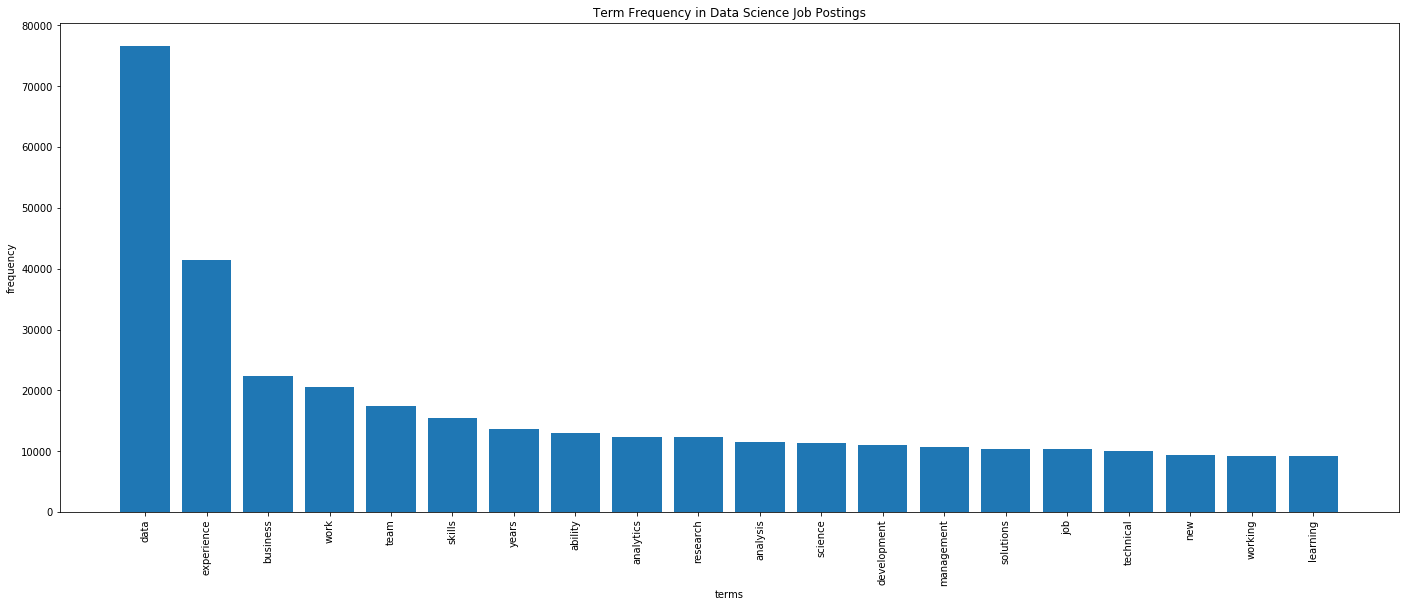

In [12]:
arr=np.array(words_freq[:20])
X=arr[:,0]
y=arr[:,1]
y=y.astype(int)

fig, ax = plt.subplots(figsize=(24,9))
ax.bar(X,y)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.set_xlabel('terms')
ax.set_ylabel('frequency')
ax.set_title('Term Frequency in Data Science Job Postings')

In [13]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 1), stop_words='english')
bag_of_words = tfidf.fit_transform(dfclean['job_description'])
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(bag_of_words.toarray()).flatten()[::-1]

n = 20
X = feature_array[tfidf_sorting][:n]
y = np.sort(bag_of_words.toarray()).flatten()[::-1]
y=y[:n]

Text(0.5,1,'TFIDF in Data Science Job Postings')

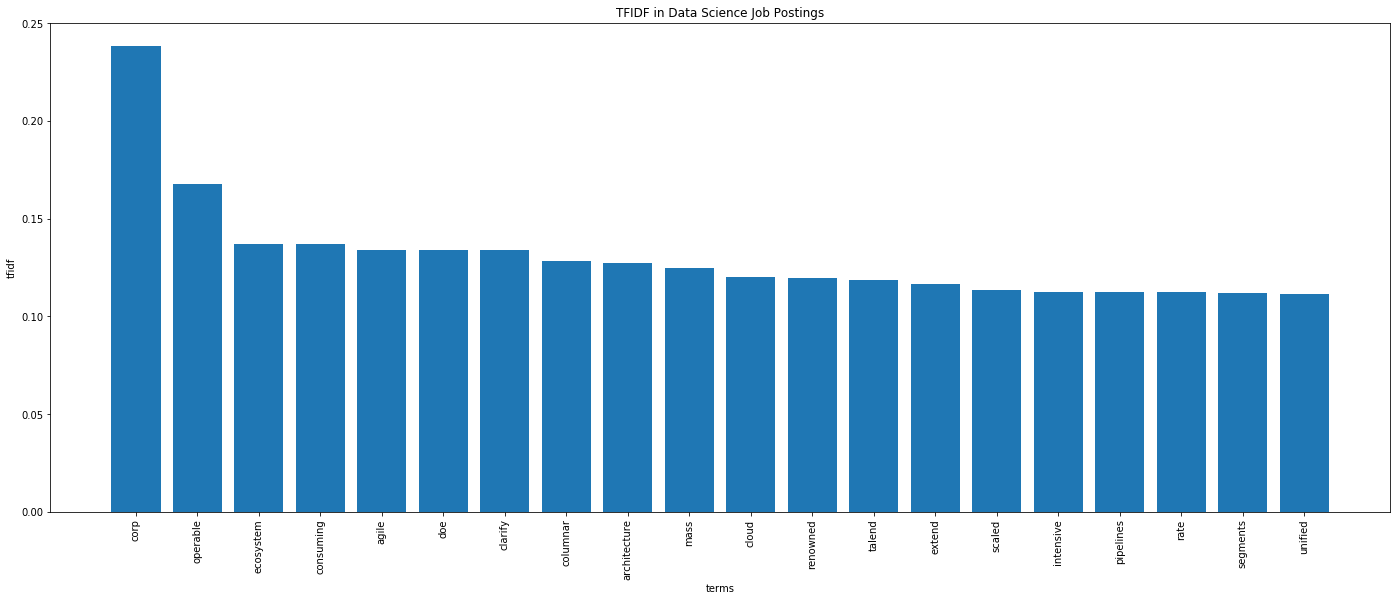

In [14]:
fig, ax = plt.subplots(figsize=(24,9))
ax.bar(X,y)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.set_xlabel('terms')
ax.set_ylabel('tfidf')
ax.set_title('TFIDF in Data Science Job Postings')

In [15]:
skeelz

{'.net',
 'a/b testing',
 'ab testing',
 'accuracy',
 'advanced degree',
 'ai',
 'analysis skills',
 'analytical',
 'analyze',
 'angular',
 'ansible',
 'aws',
 'azure',
 'bayesian',
 'bernoulli',
 'big data',
 'biotechnology',
 'boosting',
 'c++',
 'calculus',
 'cassandra',
 'ci',
 'classification',
 'clojure',
 'cloud computing',
 'communication',
 'confidence intervals',
 'cosine similarity',
 'cross validation',
 'customer lifetime value',
 'd3.js',
 'data analysis',
 'data mining',
 'data science',
 'data visualization',
 'data warehouse',
 'data wrangler',
 'decision tree',
 'deep learning',
 'distributed systems',
 'docker',
 'doctorate',
 'dynamodb',
 'embedded software',
 'engineering',
 'erp systems',
 'excel',
 'experimental design',
 'flask',
 'game theory',
 'genetics',
 'ggplot',
 'git',
 'go',
 'google cloud platform',
 'gradient boosting',
 'gradient descent',
 'hadoop',
 'hbase',
 'hive',
 'html',
 'html5',
 'image processing',
 'inventory model',
 'java',
 'javascript'

In [16]:
skills_partition={'data_visualization_front_end_skills': data_visualization_front_end_skills, 'management_skills': management_skills, 'machine_learning': machine_learning, 'programming': programming, 'cloud_computing': cloud_computing, 'math_statistics': math_statistics, 'education': education, 'data_engineering': data_engineering, 'problem_solving': problem_solving, 'miscellaneous': miscellaneous}

In [17]:
cvec=CountVectorizer(stop_words='english', vocabulary=skeelz, ngram_range=(1, 2))
cvec.fit(dfclean['job_description'])
bag_of_words=cvec.transform(dfclean['job_description'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     cvec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [18]:
from matplotlib import rcParams
rcParams.update({'font.size': 22})

Text(0.5,1,'Term Frequency in Data Science Job Postings')

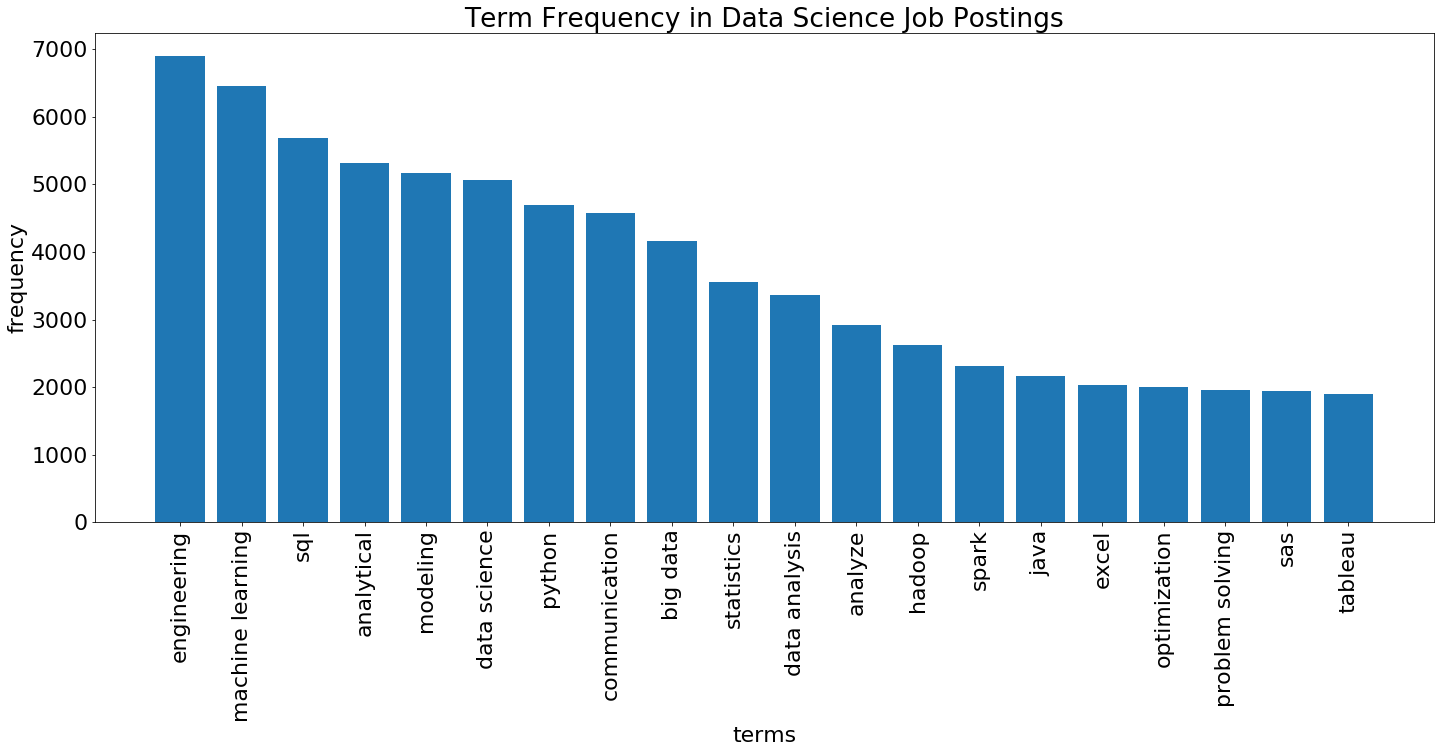

In [19]:
#bag_of_words.toarray().count()
#cvec.vocabulary_.items()
#count_words
arr=np.array(words_freq[:20])
X=arr[:,0]
y=arr[:,1]
y=y.astype(int)
fig, ax = plt.subplots(figsize=(24,9))
ax.bar(X,y)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.set_xlabel('terms')
ax.set_ylabel('frequency')
ax.set_title('Term Frequency in Data Science Job Postings')

In [20]:
#75k features
y.sum()

74831

In [21]:
dfclean['avg_salary'] = ( dfclean['salary_lower'] + dfclean['salary_upper'] )/2

In [22]:
dfclean

,company,job_description,job_title,location,stars,salary_lower,salary_upper,salary_estimator,avg_salary
0,Honeywell,Data Scientist - Entry Level\n\nHoneywell Care...,Data Scientist - Entry Level,Atlanta,3.3 ★,85,120,(glassdoor est.),102.5
1,Kabbage,Kabbage is setting a new standard in big data ...,"Data Scientist, Feature Engineering",Atlanta,4.5 ★,107,151,(glassdoor est.),129.0
2,The Home Depot,"Position Purpose:\nAt HomeDepot.com, our award...","Data Scientist, Online",Atlanta,3.5 ★,101,148,(glassdoor est.),124.5
3,Coca-Cola Company,Job ID: 41318\n\nPosition Overview:\n\nThe Dat...,Data Scientist,Atlanta,3.6 ★,93,138,(glassdoor est.),115.5
4,Grid Dynamics,"As part of the Enterprise Data team, the Data ...",Data Scientist,Atlanta,4.2 ★,94,132,(glassdoor est.),113.0
5,Rubicon Global,Description:\n\nReporting to the Product Manag...,Data Scientist,Atlanta,4.3 ★,82,124,(glassdoor est.),103.0
6,Amazon,Are you interested in applying your strong qua...,Data Scientist,Atlanta,3.8 ★,105,151,(glassdoor est.),128.0
7,mckesson,"RelayHealth Pharmacy Solutions (RHPS), a McKes...",Data Scientist,Atlanta,3.3 ★,91,133,(glassdoor est.),112.0
8,Cotiviti,Requisition Number 18-1022\nTitle Data Scienti...,Data Scientist,Atlanta,3.1 ★,106,153,(glassdoor est.),129.5
9,Honeywell Aerospace,Location: Atlanta\nJob type: Permanent\nSector...,Data Scientist,Atlanta,3.3 ★,93,130,(glassdoor est.),111.5


In [23]:
X

array(['engineering', 'machine learning', 'sql', 'analytical', 'modeling',
       'data science', 'python', 'communication', 'big data',
       'statistics', 'data analysis', 'analyze', 'hadoop', 'spark',
       'java', 'excel', 'optimization', 'problem solving', 'sas',
       'tableau'], dtype='<U16')

In [24]:
bag_of_words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
cols = cvec.get_feature_names()

In [26]:
skills_count = bag_of_words.sum(axis=1)

In [27]:
skills_count

matrix([[21],
        [25],
        [33],
        ...,
        [32],
        [33],
        [13]])

In [28]:
dfclean['skills_count'] = skills_count

In [29]:
bagofwordsdf = pd.DataFrame(bag_of_words.toarray(), columns = cols)

In [30]:
#bagofwordsdf['r'].sum()
#what's up with this??

In [31]:
bagofwordsdf['machine learning'].sum()

6460

In [32]:
bagofwordsdf.sum(axis=1)

0       21
1       25
2       33
3       17
4       22
5       15
6        5
7       13
8       27
9       48
10      28
11      20
12      18
13      14
14      14
15      17
16      29
17      10
18      14
19      14
20      23
21      23
22      13
23      17
24      20
25      26
26      15
27      15
28      21
29      22
        ..
7353    19
7354    11
7355    16
7356    24
7357    15
7358     8
7359    14
7360     4
7361    13
7362     6
7363     8
7364    34
7365     4
7366     4
7367    21
7368     3
7369    13
7370     5
7371    27
7372    17
7373    10
7374    10
7375     6
7376     5
7377    28
7378    33
7379     7
7380    32
7381    33
7382    13
Length: 7383, dtype: int64

In [63]:
X=np.array(bagofwordsdf.sum(axis=1))

In [64]:
y = np.array(dfclean['avg_salary'])

In [65]:
X

array([21, 25, 33, ..., 32, 33, 13])

In [42]:
from sklearn.linear_model import LinearRegression

In [66]:
linreg = LinearRegression()

In [68]:
X

array([21, 25, 33, ..., 32, 33, 13])

In [70]:
linreg.fit(X.reshape(-1,1),y.reshape(-1,1))

/Users/michaelpalmer/anaconda/lib/python3.5/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
from sklearn.linear_model import Lasso

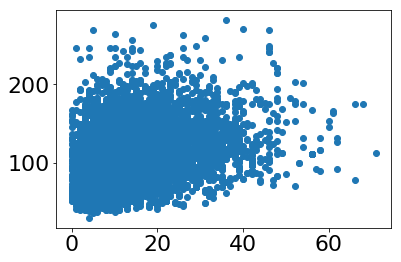

In [72]:
plt.scatter(X,y)

In [76]:
xvals = np.linspace(0,65,100)

In [84]:
rmse_train=np.sqrt(mean_squared_error(y, y_predict))

ValueError: Found input variables with inconsistent numbers of samples: [7383, 100]

In [82]:
y_predict = linreg.predict(xvals.reshape(-1,1))

In [83]:
y_predict

array([[ 86.30176782],
       [ 87.06155392],
       [ 87.82134002],
       [ 88.58112612],
       [ 89.34091222],
       [ 90.10069832],
       [ 90.86048443],
       [ 91.62027053],
       [ 92.38005663],
       [ 93.13984273],
       [ 93.89962883],
       [ 94.65941493],
       [ 95.41920104],
       [ 96.17898714],
       [ 96.93877324],
       [ 97.69855934],
       [ 98.45834544],
       [ 99.21813154],
       [ 99.97791764],
       [100.73770375],
       [101.49748985],
       [102.25727595],
       [103.01706205],
       [103.77684815],
       [104.53663425],
       [105.29642036],
       [106.05620646],
       [106.81599256],
       [107.57577866],
       [108.33556476],
       [109.09535086],
       [109.85513696],
       [110.61492307],
       [111.37470917],
       [112.13449527],
       [112.89428137],
       [113.65406747],
       [114.41385357],
       [115.17363968],
       [115.93342578],
       [116.69321188],
       [117.45299798],
       [118.21278408],
       [118